In [1]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment, ParametrizedRandomExperiment
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
TEMPERATURES = [1]
SIMULATIONS = [100]
TRIAL = 1

env1 = StatelessGym.make('Acrobot-v1')
#env2 = StatelessGym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

agent = MCTS.mcts_agent(horizon=-1)

experiment1 = Experiment(env1, agent, temperatures=TEMPERATURES, simulations=SIMULATIONS, trial=TRIAL, experiment_name="FrozenLake Base MCTS")

Simulation =  100 	Mean Cumulative Reward =  -378.0 	Error =  0.0
Temperature =  1  Results =  [-378.0]


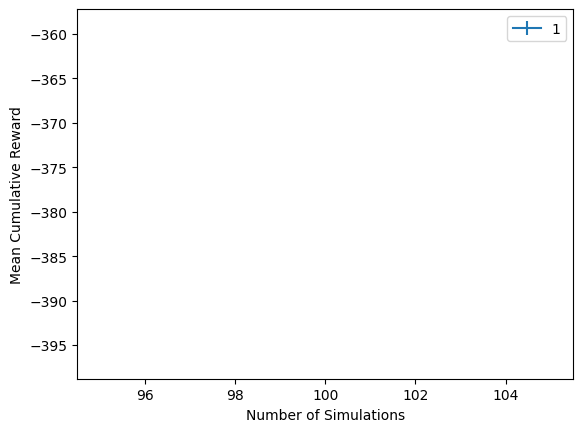

In [20]:
experiment1.run(save=False)
experiment1.show_results()

In [1]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment
import pandas as pd
import matplotlib.pyplot as plt
import os

env = StatelessGym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
agent = MCTS.mcts_agent(horizon=-1)

rand_experiment = RandomExperiment(env, agent, simulations=[1, 16], temperature=1)
result = rand_experiment.run()
print(result)

ds = rand_experiment.create_dataset(10, "test_with_features")
print(ds)

[1, 15, 0.0, 0.0]
test_with_features: 1/10
test_with_features: 2/10
test_with_features: 3/10
test_with_features: 4/10
test_with_features: 5/10
test_with_features: 6/10
test_with_features: 7/10
test_with_features: 8/10
test_with_features: 9/10
test_with_features: 10/10
[]


In [8]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import ParametrizedRandomExperiment
import pandas as pd
import matplotlib.pyplot as plt
import os

env = StatelessGym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
agent = MCTS.mcts_agent(horizon=-1)

rand_experiment = ParametrizedRandomExperiment(env, agent, simulations=[1, 16], temperature=1, map_size=[4, 6], freeze_prob=[0.1, 1])
result = rand_experiment.run()
print(result)

ds = rand_experiment.create_dataset(10, "test_with_parametrized_fl")
print(ds)

[1, ['SFHHH', 'FHHHH', 'FHHHH', 'FHHHF', 'FFFFG'], 4, 0.0, 0.0]
test_with_parametrized_fl: 1/10
test_with_parametrized_fl: 2/10
test_with_parametrized_fl: 3/10
test_with_parametrized_fl: 4/10
test_with_parametrized_fl: 5/10
test_with_parametrized_fl: 6/10
test_with_parametrized_fl: 7/10
test_with_parametrized_fl: 8/10
test_with_parametrized_fl: 9/10
test_with_parametrized_fl: 10/10
[]


['SFHF', 'HFFF', 'FFHF', 'FFFG']
<class 'list'>
   Temperature                                  Map  Simulations  Return  \
0          500             [SFHF, HFFF, FFHF, FFFG]           65     1.0   
1          500             [SHHH, FHHF, FFFH, HHFG]           68     0.0   
2          500             [SFFH, HFFH, FHFF, HHHG]           64     1.0   
3          500             [SFHH, FFHF, FFFF, FFHG]           64     1.0   
4          500             [SHHH, FHHF, FFHH, HFFG]           42     0.0   
5          500  [SFHFH, FFFFH, HHFFF, HFHFH, FHHFG]           16     0.0   
6          500             [SFFF, FFFH, FHFF, HHFG]           51     1.0   
7          500  [SHFHH, FFHFF, FFFFF, HFFHF, HFFFG]           55     0.0   
8          500  [SHHFF, FFFFH, FFFFF, HFFHH, HFFFG]           21     0.0   
9          500             [SFFF, FFHF, FFFF, FFFG]           87     1.0   

   Discounted Return  F_count  
0           0.964588       11  
1           0.000000        6  
2           0.91106

<ErrorbarContainer object of 3 artists>

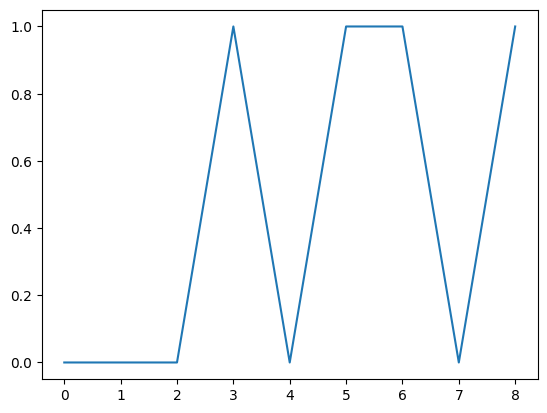

In [24]:
df = pd.read_csv('../datasets/parametrized_test.csv')
import ast

# Assuming your DataFrame is named 'df' and the column of interest is 'column_name'
if 'Map' in df.columns:
    df['Map'] = df['Map'].apply(ast.literal_eval)
    map = df.iloc[0]["Map"]
    df['F_count'] = df['Map'].apply(lambda x: sum(row.count('F') for row in x))
    print(map)
    print(type(map))

print(df)

group_simulation = df.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()

plt.errorbar(list(range(len(group_simulation))),  mean_returns, yerr=std_returns.array)

In [16]:
dataset_name = "Cluster_%d_1-16_1000-t500-Cartpole.csv"
dataset = pd.DataFrame()

for i in range(1, 11):
    dataset = dataset.append(pd.read_csv('../datasets/' + dataset_name % i), ignore_index=True)
    
print(dataset)

      Temperature  Simulations  Return
0             500            5   223.0
1             500           13   500.0
2             500           12   423.0
3             500            3    68.0
4             500            8   162.0
...           ...          ...     ...
9995          500           13   500.0
9996          500           12   500.0
9997          500           14   210.0
9998          500            5   500.0
9999          500            6   348.0

[10000 rows x 3 columns]


In [8]:
directory = "../datasets/after_bug/s1-100-t1-FrozenLake-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()
print (dataset_names)

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
if 'Map' in dataset.columns:
    dataset['Map'] = dataset['Map'].apply(ast.literal_eval)
    dataset['F_count'] = dataset['Map'].apply(lambda x: sum(row.count('F') for row in x))
print(dataset)

['Cluster_10_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_10_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_1_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_1_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_2_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_2_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_3_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_3_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_4_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_4_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_5_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_5_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_6_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_6_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_7_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_7_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_8_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_8_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_9_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_9_100_s1_100-t1-FrozenLake-v1.csv']
       Temperature  Simulations  Return  Discounted Return
0                1          

       Temperature  Simulations  Return  Discounted Return
0                1           45     1.0           0.911066
1                1           21     1.0           0.941680
2                1            6     1.0           0.747189
3                1           48     1.0           0.820126
4                1           50     1.0           0.953065
...            ...          ...     ...                ...
10995            1           58     1.0           0.947355
10996            1           10     1.0           0.894789
10997            1           73     1.0           0.976250
10998            1           34     1.0           0.922081
10999            1           43     1.0           0.967491

[11000 rows x 4 columns]


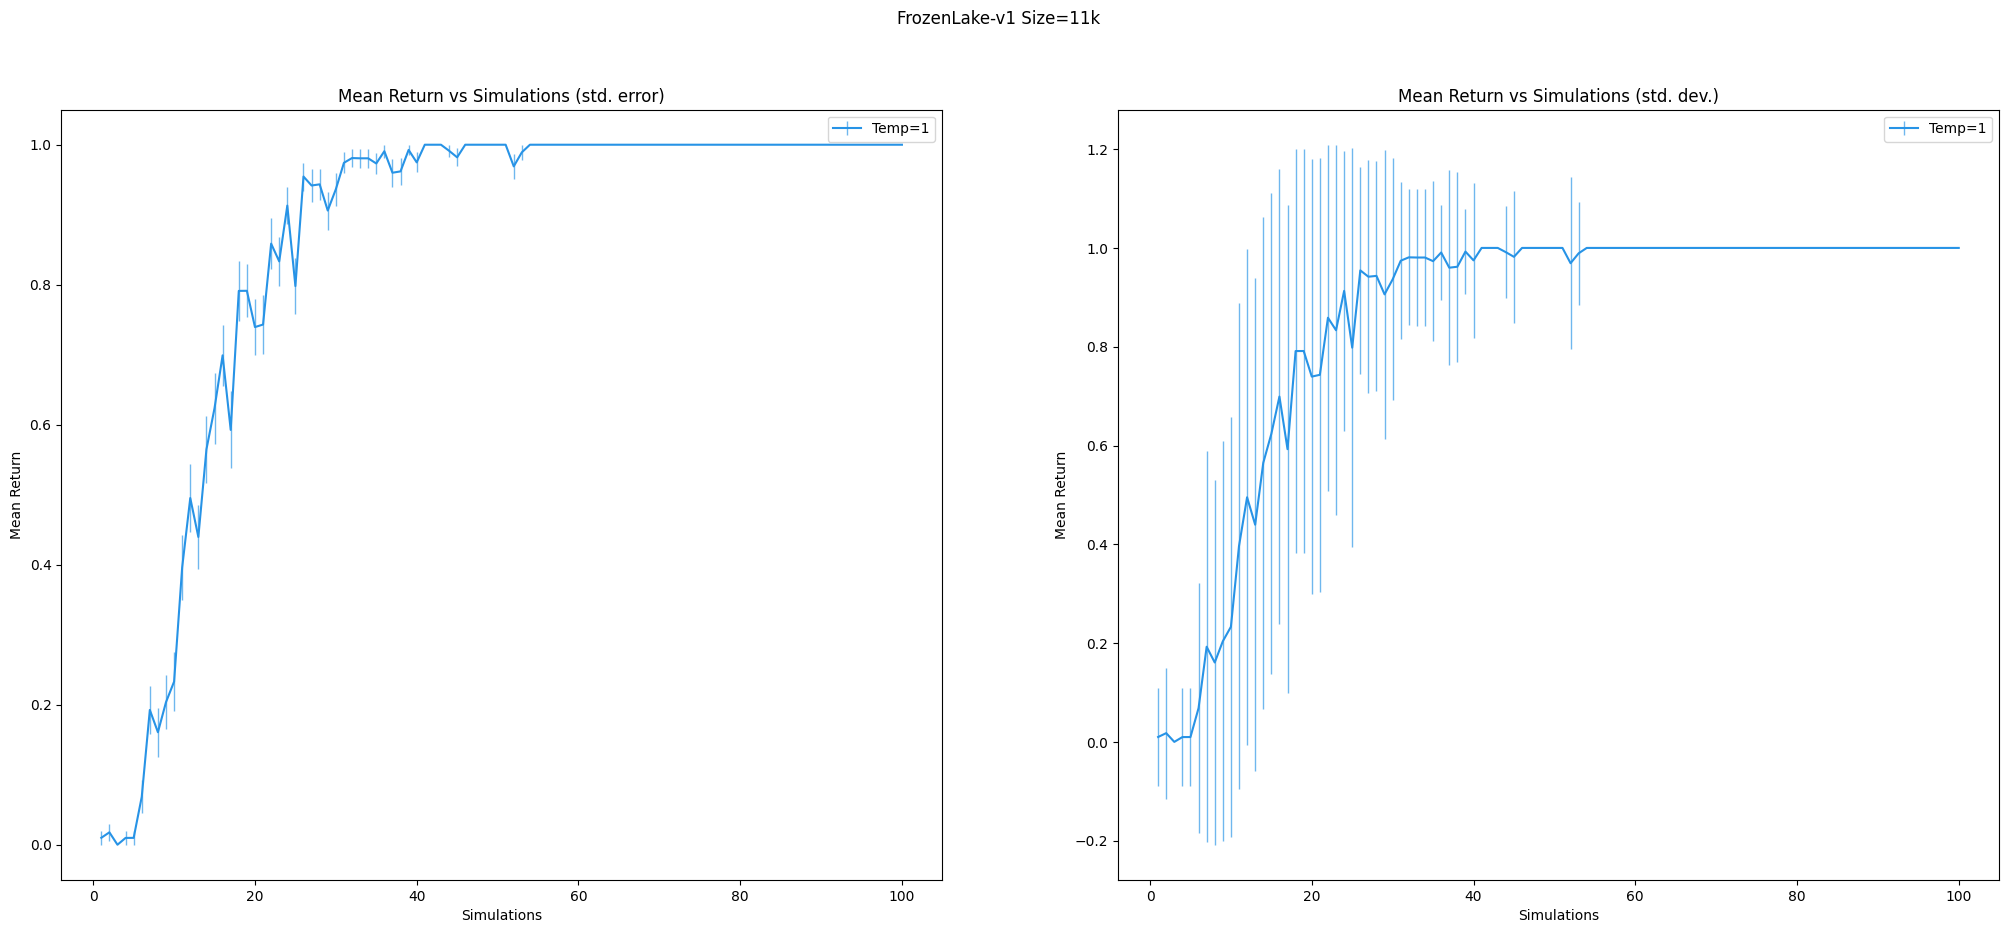

In [12]:
directory = "../datasets/after_bug/s1-100-t1-FrozenLake-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
print(dataset)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)


#plt.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array)
#plt.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('FrozenLake-v1 Size=11k')
fig.set_size_inches(25, 10)

ax1.set_title("Mean Return vs Simulations (std. error)")
ax2.set_title("Mean Return vs Simulations (std. dev.)")
ax1.xaxis.set_label_text("Simulations")
ax1.yaxis.set_label_text("Mean Return")
ax2.xaxis.set_label_text("Simulations")
ax2.yaxis.set_label_text("Mean Return")

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, color="#2793e6", ecolor="#2793e6aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, color="#2793e6", ecolor="#2793e6aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

directory = "../datasets/after_bug/s1-100-t1-FrozenLake-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
group_simulation = dataset.groupby("Simulations")
mean_discounted_returns = group_simulation["Discounted Return"].mean()
std_discounted_returns = group_simulation["Discounted Return"].std()
error_discounted_returns = std_returns / (group_simulation["Discounted Return"].count() ** 0.5)

#ax1.errorbar(list(group_simulation.indices.keys()),  mean_discounted_returns, yerr=error_discounted_returns.array, color="#e68327aa", ecolor="#e68327aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
#ax2.errorbar(list(group_simulation.indices.keys()),  mean_discounted_returns, yerr=std_discounted_returns.array, color="#e68327aa", ecolor="#e68327aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

ax1.legend()
ax2.legend()

In [41]:
directory = "../datasets/1000_s1-100_t1_Cartpole/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

d:\TU Delft\YEAR 2\MCTS_Time_Management\.conda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


# Histogram for a specific simulation number

In [18]:
directory = "../datasets/after_bug/s1-100-t1-FrozenLake-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

In [19]:
dataset.describe()

,Temperature,Simulations,Return,Discounted Return
count,11000.0,11000.000000,11000.000000,11000.000000
mean,1.0,50.805455,0.857636,0.803650
std,0.0,28.772692,0.349439,0.330844
min,1.0,1.000000,0.000000,0.000000
25%,1.0,26.000000,1.000000,0.876167
50%,1.0,51.000000,1.000000,0.947355
75%,1.0,76.000000,1.000000,0.970402
max,1.0,100.000000,1.000000,0.985090


In [33]:
#sim10
pole_angle = dataset[dataset["Simulations"] == 10]["Pole Angular Velocity"]

plt.scatter(pole_angle, dataset[dataset["Simulations"] == 10]["Return"], s=1, color="#2793e6", label="Temp=%d" % dataset["Temperature"].iloc[0])

KeyError: ('Pole Angular Velocity', 'Pole Angle')

count    113.000000
mean       0.017305
std        0.129492
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.979188
Name: Discounted Return, dtype: float64
count    103.000000
mean       0.008481
std        0.086072
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.873539
Name: Discounted Return, dtype: float64
count    102.000000
mean       0.008436
std        0.085204
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.860514
Name: Discounted Return, dtype: float64
count    117.000000
mean       0.053062
std        0.196771
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.800648
Name: Discounted Return, dtype: float64
count    135.000000
mean       0.159543
std        0.328876
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.947355
Name: Discounted Return, dtype: float64


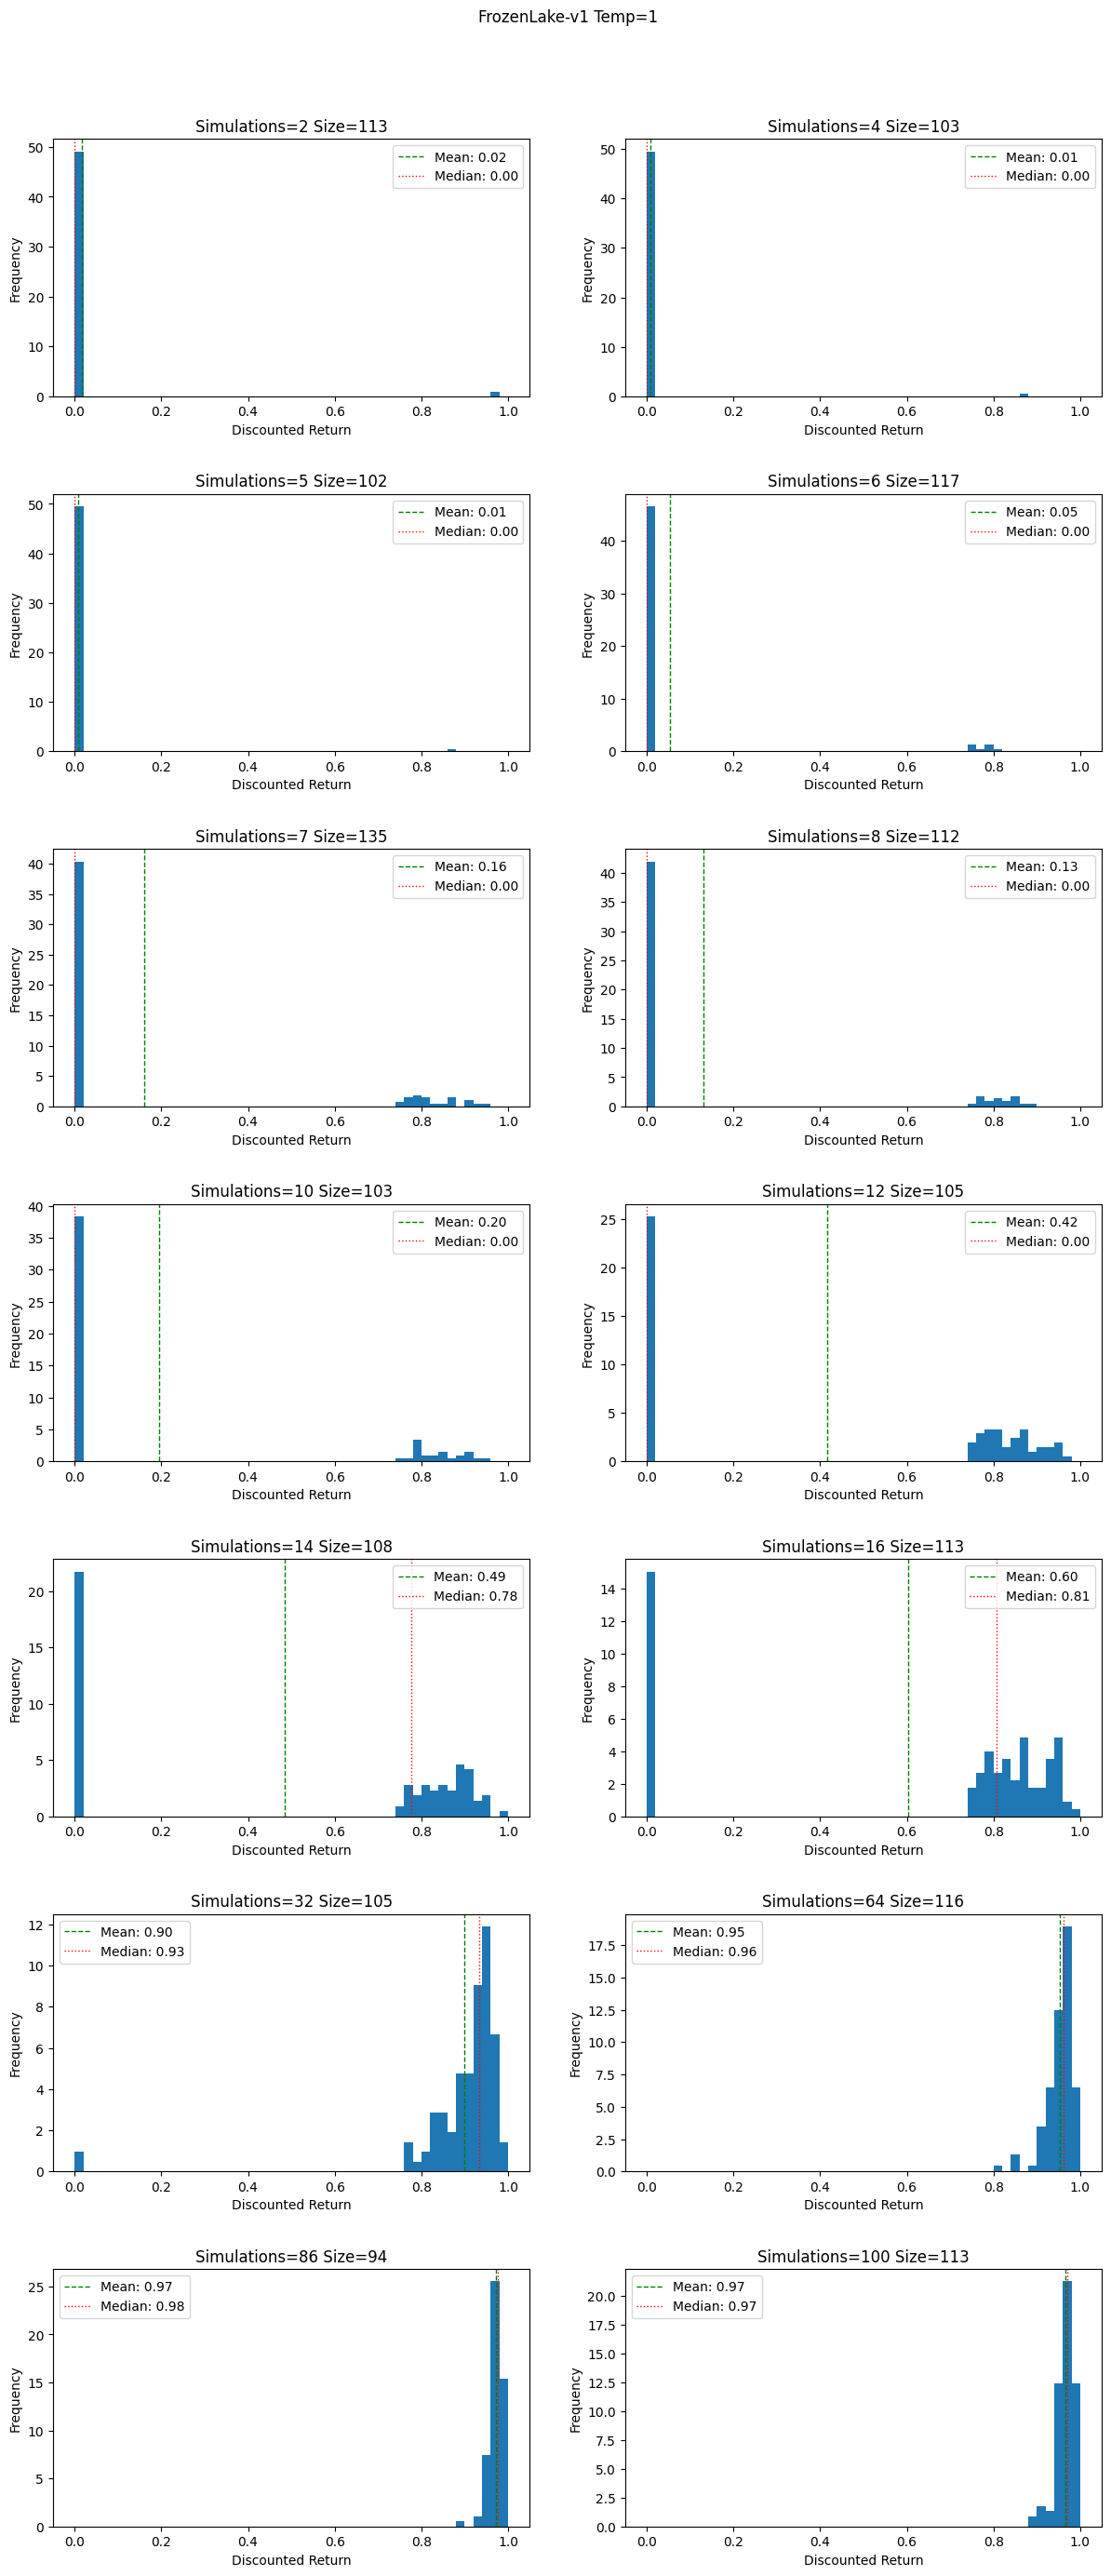

In [21]:
sims = [2, 4, 5, 6, 7, 8, 10, 12, 14, 16, 32, 64, 86, 100]
bins = 50
fig, axes = plt.subplots(len(sims) // 2 + len(sims) % 2, 2)
fig.suptitle('FrozenLake-v1 Temp=1')
fig.set_size_inches(12, 4 * (len(sims) // 2))
fig.tight_layout()
fig.subplots_adjust(wspace=0.2,
                    hspace=0.38,
                    top=0.93)

for i in range(len(sims)):
    print(group_simulation["Discounted Return"].get_group(sims[i]).describe())
    current_ax = axes[i // 2][i % 2]
    return_group = group_simulation["Discounted Return"].get_group(sims[i])
    current_ax.hist(return_group, bins=bins, density=True, range=[0, 1])
    current_ax.axvline(return_group.mean(), color="green", linestyle='dashed', linewidth=1, label = "Mean: %.2f" % return_group.mean())
    current_ax.axvline(return_group.median(), color="red", linestyle='dotted', linewidth=1, label = "Median: %.2f" % return_group.median())
    
    current_ax.set_title("Simulations=%d Size=%d" % (sims[i], len(return_group)))
    current_ax.xaxis.set_label_text("Discounted Return")
    current_ax.yaxis.set_label_text("Frequency")
    current_ax.legend()


In [66]:
print(list(group_simulation.indices.keys()))
print(mean_returns)
print(group_simulation["Return"].count())
print(error_returns.array)

[2, 5, 6, 8, 9, 10, 11, 13, 15, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 43, 45, 46, 49, 52, 54, 55, 56, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 84, 86, 93, 98, 99]
Simulations
2     156.500000
5     229.500000
6     500.000000
8     248.000000
9     319.250000
10    280.500000
11    285.000000
13    426.000000
15    390.000000
18    500.000000
19    245.000000
22    171.000000
23    352.000000
24    253.000000
25    352.666667
26    500.000000
27    500.000000
28    339.000000
29    364.000000
30    500.000000
31    500.000000
32    392.500000
33    288.000000
36    261.000000
37    500.000000
38    327.000000
39    376.333333
40    421.000000
41    349.000000
43    243.000000
45    227.000000
46    305.000000
49    308.000000
52    329.000000
54    500.000000
55    410.666667
56    410.250000
61    425.000000
62    500.000000
63    460.000000
65    500.000000
68    495.500000
69    500.000000
70    448.000000
71    50

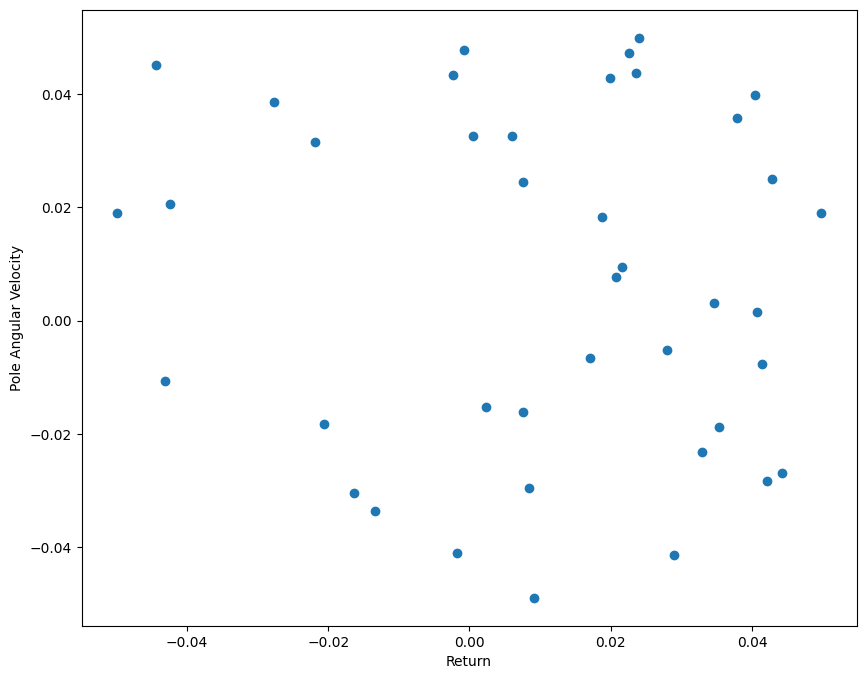

In [19]:
# Filter the data where simulations=8
filtered_data = dataset[dataset['Simulations'] == 12]
filtered_data = filtered_data[filtered_data['Return'] >= 500]

# Extract the required columns
pole_angle = filtered_data['Pole Angle']
pole_angular_velocity = filtered_data['Pole Angular Velocity']
return_value = filtered_data['Return']

# Create the 3D scatter plot
plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111, projection='3d')

# Plot the data
plt.scatter(pole_angle, pole_angular_velocity)

# Set labels for the axes
plt.xlabel('Return')
plt.ylabel('Pole Angular Velocity')


# Show the plot
plt.show()

# Regression Algorithms

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import median_absolute_error, mean_squared_log_error, max_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance
from sklearn.preprocessing import OneHotEncoder
import os
import pandas as pd
import ast
import numpy as np

In [104]:
def encode_maze(maze):
    num_rows = len(maze)
    num_cols = len(maze[0])

    encoded_maze = []

    for i in range(num_rows):
        for j in range(num_cols):
            if maze[i][j] == 'S':
                encoded_maze.append(0)
            elif maze[i][j] == 'F':
                encoded_maze.append(1)
            elif maze[i][j] == 'H':
                encoded_maze.append(2)
            elif maze[i][j] == 'G':
                encoded_maze.append(3)
    return encoded_maze

In [105]:
def encode_map(map):
    # Convert the map to a 2D array
    map_array =  []
    for row in map:
        for letter in row:
            map_array.append([letter])
    # Create an instance of OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # Fit and transform the map array
    encoded_map = encoder.fit_transform(map_array).astype('int64')

    # Get the categories (unique values) from the encoder
    categories = encoder.categories_[0]

    # Create a dictionary to map the encoded values to the original categories
    category_mapping = {i: category for i, category in enumerate(categories)}

    # Return the encoded map and the category mapping
    return encoded_map, category_mapping


In [2]:
directory = "../datasets/after_bug/states_s1-100_t500_Cartpole-v1/"
#directory = "../datasets/10k/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

if 'Map' in dataset.columns:
    dataset['Map'] = dataset['Map'].apply(ast.literal_eval)
    dataset['F_count'] = dataset['Map'].apply(lambda x: sum(row.count('F') for row in x))
    #dataset['Encoded_Map'] = dataset['Map'].apply(lambda x: encode_maze(x))
    #dataset['OneHotEncoded_Map'] = dataset['Map'].apply(lambda x: np.reshape(encode_map(x)[0], (-1)))

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

In [113]:
#print(dataset['Map'].iloc[0])
#print(encode_map(dataset['Map'].iloc[0])[0])
#print(dataset.iloc[0])
print(type(dataset['OneHotEncoded_Map'].iloc[0][0]))

<class 'numpy.int64'>


In [7]:
import numpy as np
#features = ['Simulations', 'Cart Position', 'Cart Velocity', 'Pole Angle', 'Pole Angular Velocity']
features = ['Simulations']
#features = ['Simulations', 'F_count']

if 'Encoded_Map' in features:
    features.remove('Encoded_Map')
    X = np.append(dataset[features].values.reshape(-1, len(features)), dataset['Encoded_Map'].apply(pd.Series).values, axis=1)
    print(type(X))
elif 'OneHotEncoded_Map' in features:
    features.remove('OneHotEncoded_Map')
    X = np.append(dataset[features].values.reshape(-1, len(features)), dataset['OneHotEncoded_Map'].apply(pd.Series).values, axis=1).astype('int64')
else:
    X = dataset[features].values.reshape(-1, len(features))
y = dataset['Discounted Return'].values

# for row in X:
#     row[1] = row[3] * row[4]

#from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
#scaler = StandardScaler()

# Fit the scaler to your data (compute the mean and standard deviation)
#scaler.fit(X)

# Transform your data by applying the scaler
#X = scaler.transform(X)

In [115]:
X = X.astype('int64')

In [26]:
for point in X:
    for element in point:
        if type(element) != np.int64:
            print(element)
print(X.shape)
print(y.shape)

(11000, 1)
(11000,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
uniques = np.unique(X_test, axis=0)
print(uniques)

new_X_test = uniques
new_y_test = np.zeros(len(uniques))
new_y_test_count = np.zeros(len(uniques))
for i in range(len(X_test)):
    n = 
    new_y_test[X_test[i][0]] = ((new_y_test[X_test[i][0]]) * n) + y_test[i]) / (n + 1)

[[  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]]


In [5]:
models = {
    #'LinearRegression': LinearRegression(),
    # #'Ridge': Ridge(alpha=1.0),
    # #'Lasso': Lasso(alpha=1.0),
    # #'ElasticNet':  ElasticNet(alpha=1.0, l1_ratio=0.5),
    #'SVR': SVR(),
    #'DecisionTreeRegressor': DecisionTreeRegressor(),
    #'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    #'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
    #'MLPRegressor': MLPRegressor(hidden_layer_sizes=(50,50), activation='tanh', learning_rate='adaptive')
}

In [6]:
print(X_test)

[[ 9.20000000e+01 -4.93560769e-02  3.76965962e-02 -8.02802015e-03
  -3.38393599e-02]
 [ 4.20000000e+01 -2.04830840e-02  2.69194338e-02 -3.17089073e-02
   9.39631776e-04]
 [ 4.00000000e+01 -2.81206090e-02 -1.23528522e-02  4.29189531e-03
  -1.02073886e-02]
 ...
 [ 9.10000000e+01  4.36361954e-02  4.78301533e-02 -1.74104571e-02
  -2.39021536e-02]
 [ 9.50000000e+01 -7.38861365e-03 -1.33521752e-02  4.23863195e-02
  -2.29571294e-02]
 [ 6.30000000e+01  3.36959064e-02  1.39787968e-03 -1.14450250e-02
   1.21464161e-02]]


In [ ]:
predictions = {}  # Dictionary to store predictions

# Example usage: training and predicting with each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    
    # Perform further operations with the predictions

In [29]:
predictions = {}  # Dictionary to store predictions

# Example usage: training and predicting with each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    
    # Perform further operations with the predictions

In [30]:
metrics = {
    'Mean Squared Error': mean_squared_error,
    #'Mean Absolute Error': mean_absolute_error,
    'R^2 Score': r2_score,
    #'Explained Variance Score': explained_variance_score,
    #'Median Absolute Error': median_absolute_error,
    #'Mean Squared Log Error': mean_squared_log_error,
    #'Max Error': max_error,
    #'Mean Poisson Deviance': mean_poisson_deviance,
    #'Mean Gamma Deviance': mean_gamma_deviance,
    #'Mean Tweedie Deviance': mean_tweedie_deviance
}

# Example usage: iterating over the predictions dictionary and calculating metrics

for model_name, y_pred in predictions.items():
    print(f"Model: {model_name}")
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        print(f"{metric_name}: {metric_value}")
    print()


Model: LinearRegression
Mean Squared Error: 0.06463782992136967
R^2 Score: 0.40970047406619226

Model: SVR
Mean Squared Error: 0.03445793230273527
R^2 Score: 0.6853158417027987

Model: RandomForestRegressor
Mean Squared Error: 0.03225836669505952
R^2 Score: 0.7054031889582801

Model: GradientBoostingRegressor
Mean Squared Error: 0.03223385797661622
R^2 Score: 0.7056270127607798



## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grids = {
    # 'LinearRegression': {
    #     'fit_intercept': [True, False],
    #     'normalize': [True, False]
    # },
    # 'SVR': {
    #     'kernel': ['linear', 'rbf'],
    #     'C': [0.1, 1, 10]
    # },
    # 'DecisionTreeRegressor': {
    #     'max_depth': [None, 5, 10],
    #     'min_samples_split': [2, 5, 10]
    # },
    # 'RandomForestRegressor': {
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [None, 5, 10],
    #     'min_samples_split': [2, 5, 10]
    # },
    # 'GradientBoostingRegressor': {
    #     'n_estimators': [50, 100, 200],
    #     'learning_rate': [0.1, 0.01, 0.001],
    #     'max_depth': [3, 5, 10]
    # },
    'MLPRegressor': {'hidden_layer_sizes': [(3000, 3000, 3000), (5000, 5000, 5000), (3000, 3000, 3000, 3000)],
                     'activation': ['tanh', 'relu'],},
}
SIZE = 1000

for model_name, model in models.items():
    print(f"Performing grid search for {model_name}")
    param_grid = param_grids[model_name]
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=['r2', 'neg_mean_squared_error'], refit='r2', verbose=3, return_train_score=True)
    grid_search.fit(X[0:SIZE], y[0:SIZE])
    
    best_params = grid_search.best_params_
    print(grid_search.cv_results_.keys())
    print(f"Best parameters for {model_name}: {best_params}")
    print(grid_search.cv_results_)


In [35]:
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results['mean_train_r2'])
print(cv_results['mean_test_r2'])
analysis = cv_results[['param_hidden_layer_sizes', 'param_activation', 'mean_train_r2', 'mean_test_r2']]
analysis['size'] = SIZE
analysis.to_csv('../results/working/analysis_cartpole.csv', index=False, header=False, mode='a')

0   -28.558516
1   -28.450361
2     0.553276
3   -28.286691
4     0.219233
5     0.428860
6     0.386526
7     0.476536
Name: mean_train_r2, dtype: float64
0   -30.225766
1   -30.152941
2     0.500142
3   -29.964387
4     0.187744
5     0.376051
6     0.333485
7     0.421591
Name: mean_test_r2, dtype: float64


C:\Users\onerk\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Learning Curve

In [17]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(models['MLPRegressor'], X, y, cv=5, train_sizes=np.append(np.linspace(0.01, 0.1, 10, endpoint=False), np.linspace(0.1, 1.0, 10)), scoring='r2', verbose=3)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

[learning_curve] Training set sizes: [  88  167  246  325  404  484  563  642  721  800  880 1760 2640 3520
 4400 5280 6160 7040 7920 8800]


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-79.101, test=-45.495) total time=   0.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-67.846, test=-45.511) total time=   0.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-70.997, test=-41.756) total time=   1.7s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-78.157, test=-41.291) total time=   1.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-59.233, test=-38.001) total time=   2.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-48.539, test=-37.815) total time=   2.1s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-45.908, test=-37.588) total time=   2.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-36.962, test=-34.381) total time=   3.1s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-35.560, test=-33.903) total time=   3.2s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-38.769, test=-34.236) total time=   3.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-36.891, test=-31.144) total time=   3.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-18.996, test=-20.387) total time=   7.6s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-10.398, test=-10.817) total time=  11.6s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-5.242, test=-5.628) total time=  15.9s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-2.156, test=-2.446) total time=  18.9s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-0.108, test=-0.296) total time=  33.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.425, test=0.347) total time=  30.1s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.624, test=0.584) total time=  34.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.650, test=0.616) total time=  34.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.656, test=0.621) total time=  45.2s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-57.544, test=-41.845) total time=   0.3s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-67.382, test=-41.301) total time=   0.7s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-53.481, test=-37.808) total time=   1.2s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-48.303, test=-38.372) total time=   1.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-42.879, test=-34.648) total time=   2.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-40.634, test=-34.589) total time=   2.1s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-44.360, test=-34.494) total time=   2.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-39.067, test=-31.684) total time=   2.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-38.460, test=-30.961) total time=   3.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-40.168, test=-31.209) total time=   3.7s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:  4.7min


[CV] END ..............., score=(train=-37.120, test=-28.926) total time=   5.2s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-21.353, test=-18.668) total time=   7.9s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................, score=(train=-11.210, test=-9.838) total time=  11.3s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-5.558, test=-5.093) total time=  16.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-2.325, test=-2.219) total time=  22.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-0.199, test=-0.247) total time=  24.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.426, test=0.421) total time=  31.7s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.612, test=0.620) total time=  35.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.640, test=0.653) total time=  39.9s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.648, test=0.658) total time=  41.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-57.096, test=-41.262) total time=   0.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-67.455, test=-41.088) total time=   0.6s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-53.263, test=-37.404) total time=   1.6s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-47.643, test=-37.597) total time=   1.7s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-42.524, test=-34.119) total time=   2.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-40.496, test=-34.229) total time=   2.1s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-44.275, test=-34.187) total time=   2.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-38.827, test=-31.256) total time=   2.9s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-38.782, test=-30.990) total time=   3.2s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-40.505, test=-31.239) total time=   3.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-36.645, test=-28.330) total time=   3.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-20.952, test=-18.141) total time=   7.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................, score=(train=-11.162, test=-9.568) total time=  16.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-5.491, test=-5.029) total time=  18.1s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-2.172, test=-2.016) total time=  18.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-0.192, test=-0.230) total time=  31.7s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.397, test=0.379) total time=  33.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.619, test=0.601) total time=  35.2s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.647, test=0.628) total time=  46.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.653, test=0.631) total time=  47.3s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-56.769, test=-38.400) total time=   0.3s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-67.787, test=-38.649) total time=   0.6s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-53.749, test=-35.334) total time=   1.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-47.424, test=-35.031) total time=   1.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-42.464, test=-31.894) total time=   2.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-40.133, test=-31.755) total time=   2.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-44.584, test=-32.229) total time=   2.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-38.587, test=-29.080) total time=   2.9s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-38.490, test=-28.793) total time=   3.2s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-39.999, test=-28.877) total time=   3.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-36.629, test=-26.514) total time=   3.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-21.555, test=-17.472) total time=   8.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................, score=(train=-11.309, test=-9.057) total time=  12.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-5.526, test=-4.700) total time=  16.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-2.166, test=-1.825) total time=  18.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-0.285, test=-0.155) total time=  25.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.387, test=0.433) total time=  34.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.606, test=0.635) total time=  32.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.634, test=0.667) total time=  35.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.640, test=0.673) total time=  44.6s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-57.199, test=-44.861) total time=   0.3s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-67.938, test=-44.913) total time=   0.6s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-53.701, test=-40.948) total time=   1.6s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-48.156, test=-41.262) total time=   1.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-42.354, test=-36.916) total time=   2.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-40.452, test=-37.144) total time=   2.1s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-43.711, test=-36.662) total time=   2.4s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-37.742, test=-33.017) total time=   2.9s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-38.818, test=-33.714) total time=   3.2s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-40.249, test=-33.737) total time=   3.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-36.333, test=-30.545) total time=   3.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-20.952, test=-19.786) total time=   9.6s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..............., score=(train=-11.334, test=-10.660) total time=  11.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-5.537, test=-5.614) total time=  14.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-2.282, test=-2.397) total time=  19.7s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ................., score=(train=-0.269, test=-0.323) total time=  25.0s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.384, test=0.351) total time=  27.6s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.614, test=0.596) total time=  31.8s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END ..................., score=(train=0.654, test=0.638) total time=  43.0s
[CV] END ..................., score=(train=0.650, test=0.644) total time=  38.5s


c:\Users\onerk\anaconda3\envs\research\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [18]:
# Concatenate the dataframes horizontally
df = pd.DataFrame({'train_sizes': train_sizes, 'train_mean': train_mean, 'train_std': train_std, 'test_mean': test_mean, 'test_std': test_std})

# Print the resulting dataframe
print(df)
#df.to_csv('../results/after_bug/CartPole/LearningCurve_MLP_Temp1_R2.csv', index=False)
# lc_results = pd.DataFrame(train_sizes, train_scores, test_scores)
# lc_results.describe()


    train_sizes  train_mean  train_std  test_mean  test_std
0            88  -61.541818   8.783214 -42.372631  2.578289
1           167  -67.681606   0.221417 -42.292506  2.566640
2           246  -57.038222   6.981454 -38.650036  2.374288
3           325  -53.936760  12.114533 -38.710429  2.369079
4           404  -45.890496   6.673428 -35.115583  2.152016
5           484  -42.050830   3.248059 -35.106324  2.179826
6           563  -44.567610   0.729459 -35.032092  1.900140
7           642  -38.236957   0.778346 -31.883397  1.778489
8           721  -38.022096   1.239632 -31.672370  1.918949
9           800  -39.938272   0.606803 -31.859613  1.942743
10          880  -36.723526   0.265589 -29.091732  1.647850
11         1760  -20.761445   0.912995 -18.890636  1.064282
12         2640  -11.082761   0.348086  -9.987905  0.664005
13         3520   -5.470774   0.116288  -5.212596  0.358992
14         4400   -2.220149   0.069477  -2.180516  0.233347
15         5280   -0.210453   0.062912  

In [ ]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

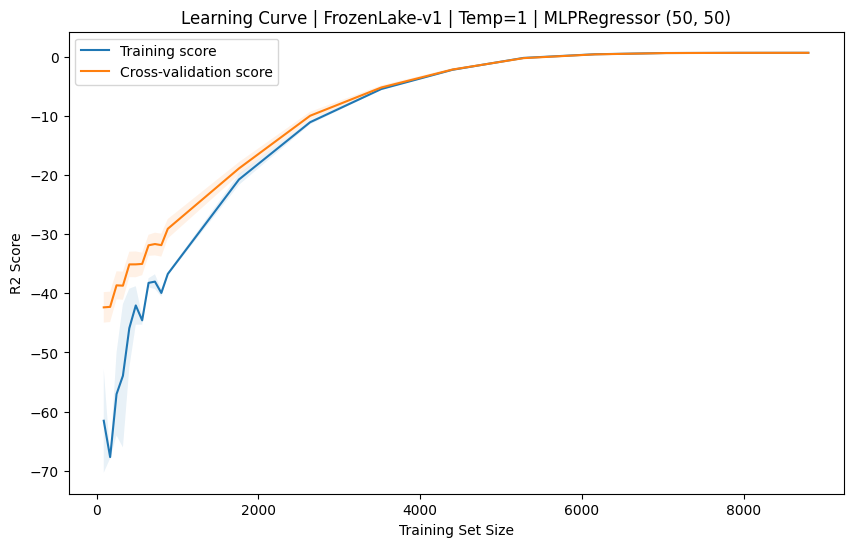

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import learning_curve
import numpy as np

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)


# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Learning Curve | FrozenLake-v1 | Temp=1 | MLPRegressor (50, 50)')
plt.legend(loc='best')
plt.show()

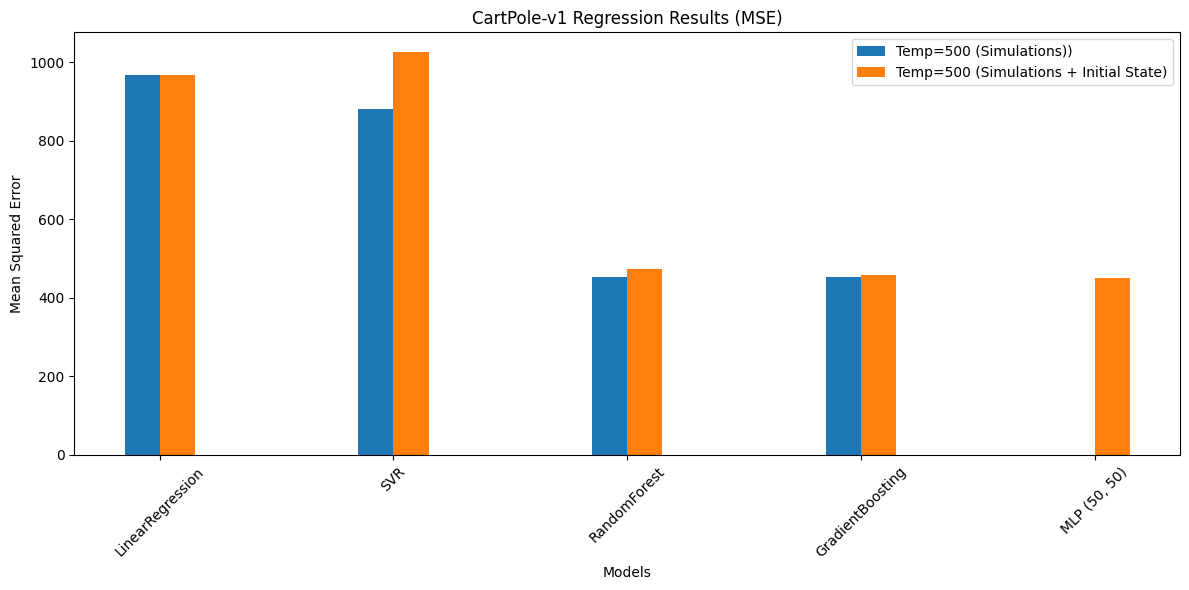

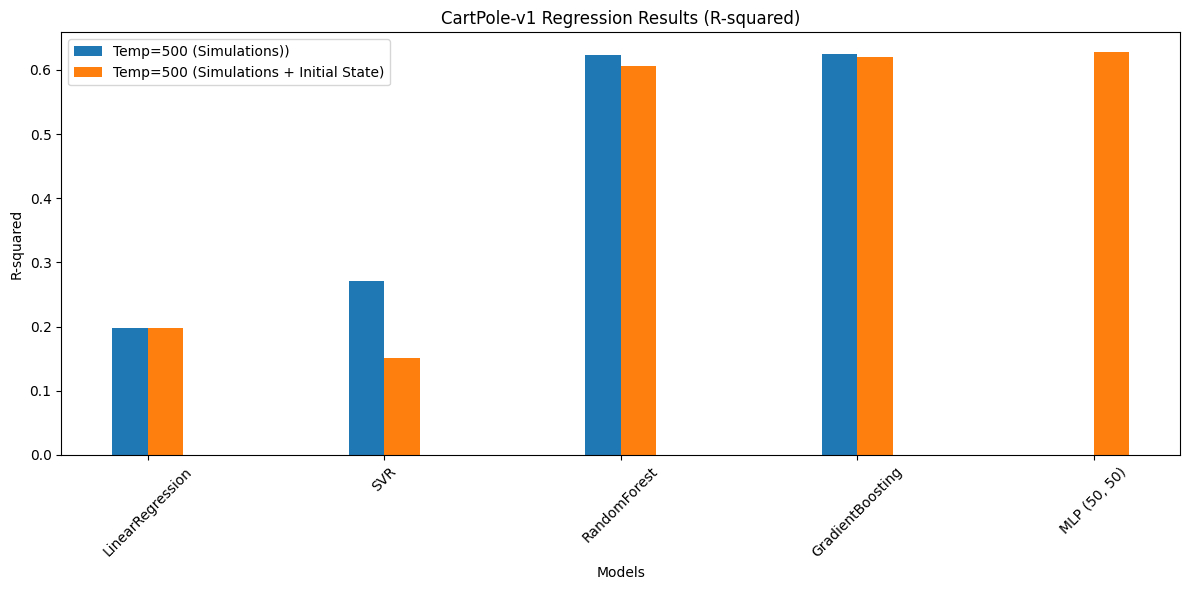

ValueError: shape mismatch: objects cannot be broadcast to a single shape

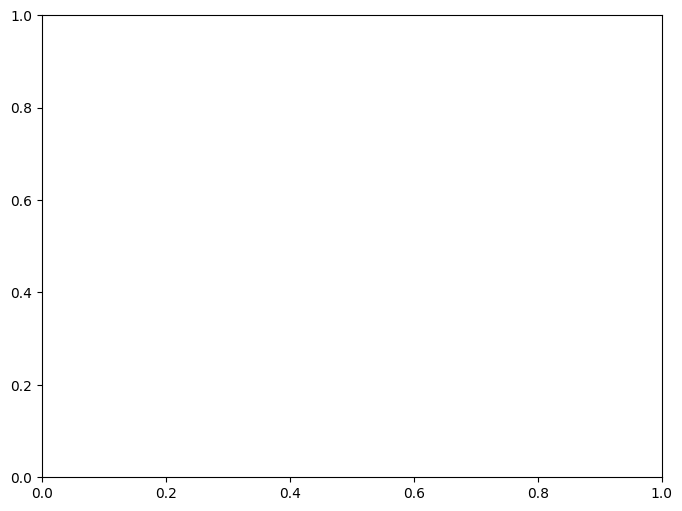

In [8]:
import  numpy as np
# MSE values for Simulations feature
mse_simulations = [967.9504691481343, 880.2782367386596, 454.3719710227911, 452.3518904474091, 0]
# R-squared values for Simulations feature
r2_simulations = [0.19808178113436004, 0.27071562211968914, 0.6235663153035735, 0.6252398920707826, 0]

# MSE values for multiple features
mse_multiple = [968.4154402338374, 1025.3355999013397, 474.8101301267042, 458.7523385251745, 449.86467625076176]
# R-squared values for multiple features
r2_multiple = [0.19769656639790834, 0.15053990444775478, 0.606633907429515, 0.6199373109098057, 0.6273004751709366]

# # MSE values for Simulations feature (second dataset)
# mse_simulations2 = [13670.563, 14105.939, 13220.481, 13202.698, 12878.918]
# # R-squared values for Simulations feature (second dataset)
# r2_simulations2 = [0.0062, -0.0255, 0.0389, 0.0402, 0.0637]

# # MSE values for multiple features (second dataset)
# mse_multiple2 = [13526.375, 14167.534, 24294.072, 13331.934, 12907.011]
# # R-squared values for multiple features (second dataset)
# r2_multiple2 = [0.0166, -0.0299, -0.7662, 0.0308, 0.0617]

# MSE values for Simulations feature
mse_fl = [0.06463782992136967, 0.03445793230273527, 0.03225836669505952, 0.03223385797661622]
# R-squared values for Simulations feature
r2_fl = [0.40970047406619226, 0.6853158417027987, 0.7054031889582801, 0.7056270127607798]


# Labels for the models
models = ['LinearRegression', 'SVR', 'RandomForest', 'GradientBoosting', 'MLP (50, 50)']

# Bar positions for each model
bar_positions = np.arange(len(models))

# Width of each bar
bar_width = 0.15

# Plotting MSE for all cases
plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 0.5 * bar_width, mse_simulations, width=bar_width, label='Temp=500 (Simulations))')
plt.bar(bar_positions + 0.5 * bar_width, mse_multiple, width=bar_width, label='Temp=500 (Simulations + Initial State)')
#plt.bar(bar_positions, mse_simulations2, width=bar_width, label='Temp=1 (Simulations))')
#plt.bar(bar_positions + bar_width, mse_multiple2, width=bar_width, label='Temp=1 (Simulations + Initial State)')
plt.title('CartPole-v1 Regression Results (MSE)')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(bar_positions, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting R-squared for all cases
plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 0.5 * bar_width, r2_simulations, width=bar_width, label='Temp=500 (Simulations))')
plt.bar(bar_positions + 0.5 * bar_width, r2_multiple, width=bar_width, label='Temp=500 (Simulations + Initial State)')
#plt.bar(bar_positions, r2_simulations2, width=bar_width, label='Temp=1 (Simulations))')
#plt.bar(bar_positions + bar_width, r2_multiple2, width=bar_width, label='Temp=1 (Simulations + Initial State)')
plt.title('CartPole-v1 Regression Results (R-squared)')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(bar_positions, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Width of each bar
bar_width = 0.4

# Plotting MSE for Frozen Lake
plt.figure(figsize=(8, 6))
plt.bar(bar_positions, mse_fl, width=bar_width, color='blue')
plt.title('Mean Squared Error for Frozen Lake')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(bar_positions, models, rotation=45)
plt.tight_layout()
plt.show()

# Plotting R-squared for Frozen Lake
plt.figure(figsize=(8, 6))
plt.bar(bar_positions, r2_fl, width=bar_width, color='green')
plt.title('R-squared for Frozen Lake')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(bar_positions, models, rotation=45)
plt.tight_layout()
plt.show()

In [33]:
directory = "../datasets/after_bug/states_s1-100_t500_Cartpole-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()

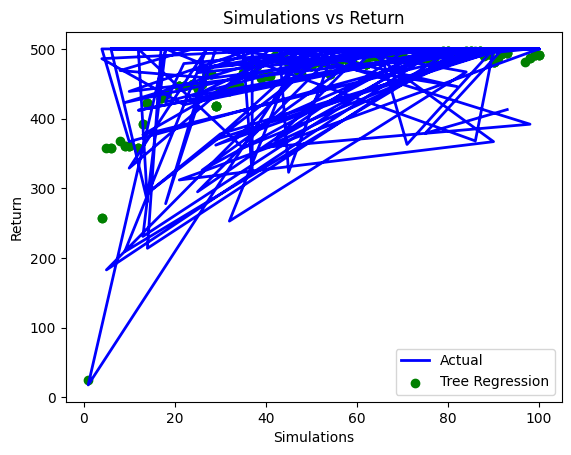

In [36]:
#plt.errorbar(list(range(1, len(group_simulation) + 1)),  mean_returns, yerr=error_returns.array)
plt.plot(X_test, y_test, linewidth=2, color='blue', label='Actual')
plt.plot(X_test, predictions['LinearRegression'], linewidth=2, color='red', label='Linear Regression')
plt.scatter(X_test, predictions['GradientBoostingRegressor'], color='green', label='Tree Regression')
#plt.scatter(X_test, forest_predictions, color='red', label='Forest Regression')


plt.xlabel('Simulations')
plt.ylabel('Return')
plt.title('Simulations vs Return')
plt.legend()
plt.show()

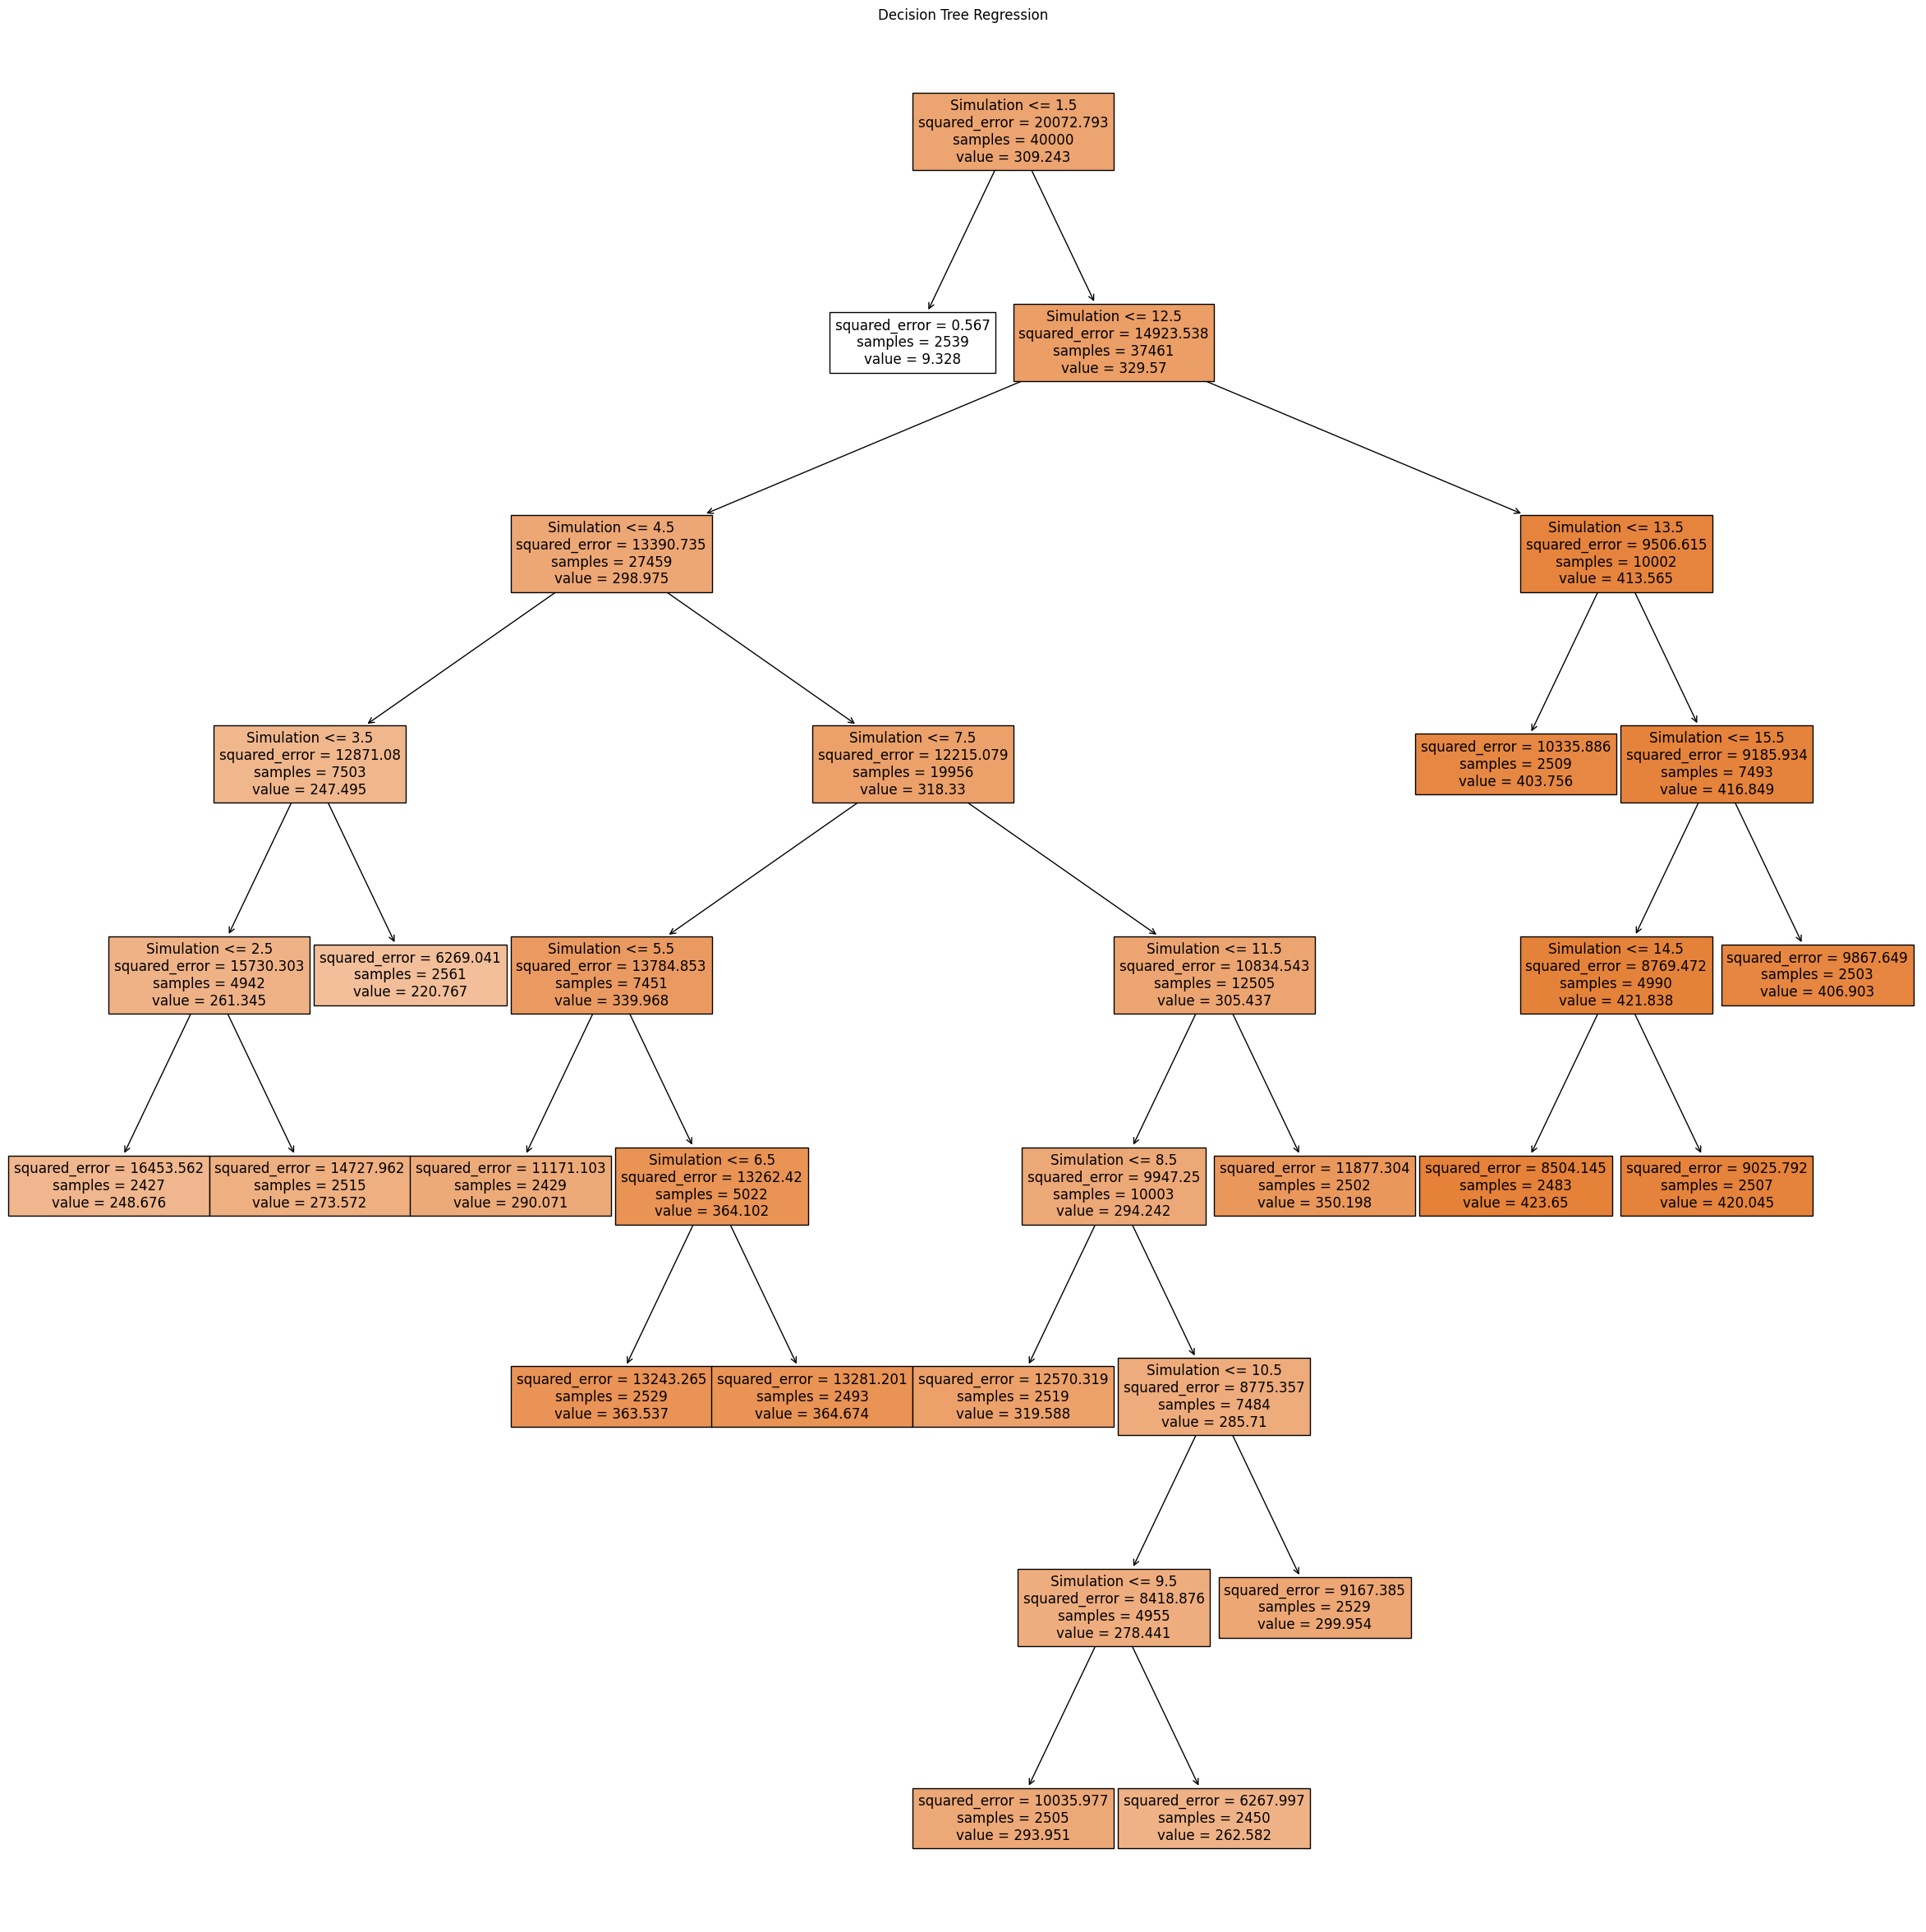

In [134]:
plt.figure(figsize=(30, 30))
plot_tree(tree_model, feature_names=['Simulation'], filled=True)
plt.title('Decision Tree Regression')
plt.show()
